In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# Load the data into a DataFrame assuming space-separated format
data = pd.read_csv('desktop/internship/dataset/NLS_Group05.txt', delimiter=r'\s+', header=None)

# Dynamically create column names based on the number of columns
num_columns = data.shape[1]  # Get the actual number of columns
column_names = ['X', 'Y'] + [f'Feature_{i}' for i in range(3, num_columns + 1)]  # Generating column names dynamically
data.columns = column_names

# Assign class labels
# First 1303 rows -> Class 1, next 1304 rows -> Class 2
class_labels = np.concatenate([np.zeros(1303), np.ones(1303)])
data['Class'] = class_labels

# Separate features (X) and target labels (Y)
X = data.drop(columns=['Class'])
Y = data['Class']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Function to calculate Euclidean distances between a random point and dataset
def euclidean_distances(X_train, random_point):
    distances = []  # To store calculated distances
    for _, row in X_train.iterrows():
        row_point = row.values  # Convert row to NumPy array
        distance = np.sqrt(np.sum((row_point - random_point) ** 2))  # Euclidean formula
        distances.append(distance)  # Append result to distances
    return np.array(distances)

# Calculate distances array
random_point = X.sample(n=1).values.flatten()  # Select a random point from X
distances = euclidean_distances(X_train, random_point)

# Calculate the mean of each class manually
class1 = data[data['Class'] == 0]  # Class 1
class2 = data[data['Class'] == 1]  # Class 2

mean_class1 = [sum(class1['X']) / len(class1), sum(class1['Y']) / len(class1)]
mean_class2 = [sum(class2['X']) / len(class2), sum(class2['Y']) / len(class2)]

# Store the class means
class_means = {
    'Class 1': mean_class1,
    'Class 2': mean_class2,
}

# Function to calculate Euclidean distance manually
def calculate_distance(point1, point2):
    distance = 0  # Initialize distance
    for i in range(len(point1)):
        difference = point1[i] - point2[i]
        distance += difference * difference  # Square the difference
    return distance ** 0.5  # Take the square root of the sum

# Calculate the distances between the random point and each class mean
distances = {}
for class_name, mean in class_means.items():
    distance = calculate_distance(random_point, mean)
    distances[class_name] = distance

# Print the distances
print("\nDistances between the random point and each class mean:")
for class_name, distance in distances.items():
    print(f"{class_name}: {distance:.2f}")

# Determine the closest class mean
closest_class = None
min_distance = float('inf')
for class_name, distance in distances.items():
    if distance < min_distance:
        min_distance = distance
        closest_class = class_name

print(f"\nThe closest class mean to the random point is: {closest_class}")



Distances between the random point and each class mean:
Class 1: 3.58
Class 2: 1.09

The closest class mean to the random point is: Class 2


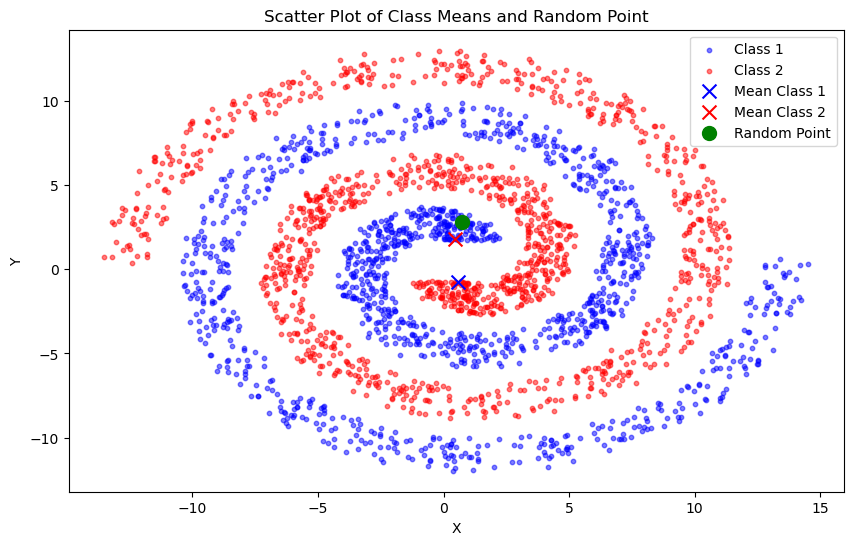

In [32]:
plt.figure(figsize=(10, 6))

# Plotting Class 1 and Class 2 points
plt.scatter(class1['X'], class1['Y'], color='blue', label='Class 1', alpha=0.5, s=10)
plt.scatter(class2['X'], class2['Y'], color='red', label='Class 2', alpha=0.5, s=10)

# Plotting the means
plt.scatter(mean_class1[0], mean_class1[1], color='blue', marker='x', s=100, label='Mean Class 1')
plt.scatter(mean_class2[0], mean_class2[1], color='red', marker='x', s=100, label='Mean Class 2')

# Plotting the random point
plt.scatter(random_point[0], random_point[1], color='green', marker='o', s=100, label='Random Point')

# Adding labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Class Means and Random Point')
plt.legend()

# Show the plot
plt.show()

In [33]:
# Assuming you have your predicted values and true labels (y_test and y_pred)

# Function to calculate the confusion matrix manually
def confusion_matrix_manual(y_true, y_pred):
    # Initialize the confusion matrix as a dictionary
    confusion = {
        'TP': 0,  # True positives
        'FP': 0,  # False positives
        'TN': 0,  # True negatives
        'FN': 0   # False negatives
    }
    
    # Loop through the true and predicted labels
    for true_label, predicted_label in zip(y_true, y_pred):
        if true_label == 1 and predicted_label == 1:
            confusion['TP'] += 1
        elif true_label == 0 and predicted_label == 1:
            confusion['FP'] += 1
        elif true_label == 0 and predicted_label == 0:
            confusion['TN'] += 1
        elif true_label == 1 and predicted_label == 0:
            confusion['FN'] += 1
    
    return confusion

# Example of manually making predictions
y_pred = []  # Store the predicted labels for the test set

# Using a simple rule: Assign to the class whose mean is closest to the point
for _, row in X_test.iterrows():
    test_point = row.values
    distances = {class_name: calculate_distance(test_point, mean) for class_name, mean in class_means.items()}
    predicted_class = min(distances, key=distances.get)  # Get the class with the minimum distance
    y_pred.append(0 if predicted_class == 'Class 1' else 1)  # Convert to binary labels: 0 for Class 1, 1 for Class 2

# Calculate the confusion matrix
conf_matrix = confusion_matrix_manual(y_test, y_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(f"True Positives (TP): {conf_matrix['TP']}")
print(f"False Positives (FP): {conf_matrix['FP']}")
print(f"True Negatives (TN): {conf_matrix['TN']}")
print(f"False Negatives (FN): {conf_matrix['FN']}")



Confusion Matrix:
True Positives (TP): 230
False Positives (FP): 166
True Negatives (TN): 217
False Negatives (FN): 169


Precision: [0.5604113110539846, 0.5801526717557252]
Recall: [0.5691906005221932, 0.5714285714285714]
F1-Score: [0.5647668393782382, 0.5757575757575758]


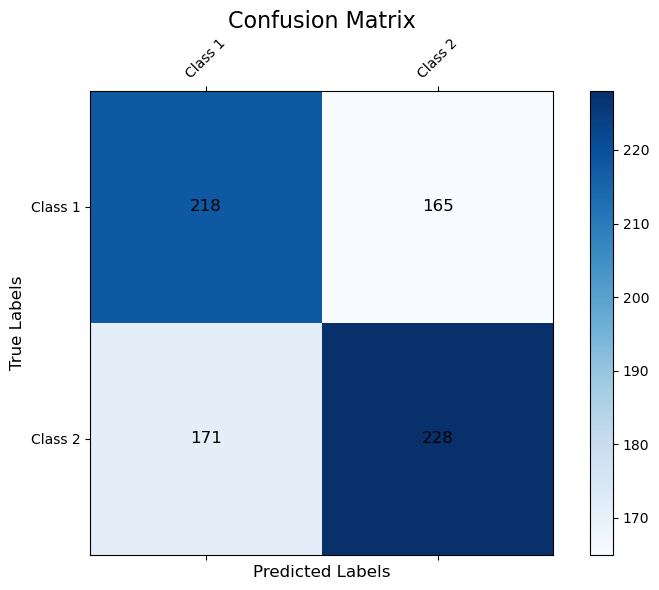

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset and assign labels
data = pd.read_csv('desktop/internship/dataset/NLS_Group05.txt', delimiter=r'\s+', header=None)
data = data.iloc[:, :2]  # Slice the first two columns
data.columns = ['X', 'Y']

# Assign class labels
class_labels = np.concatenate([np.zeros(1303), np.ones(1303)])
data['Label'] = class_labels

# Split data into features (X) and labels (y)
X = data[['X', 'Y']]  # Features
y = data['Label']     # Labels

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class means
class_means = {
    0: X_train[y_train == 0].mean(axis=0),
    1: X_train[y_train == 1].mean(axis=0),
}

# Function to classify a point based on the closest class mean
def classify_point(point, class_means):
    distances = [np.linalg.norm(point - class_mean) for class_mean in class_means.values()]
    return min(class_means, key=lambda x: distances[x])

# Predict class labels for the test set
y_pred = [classify_point(row[['X', 'Y']].values, class_means) for _, row in X_test.iterrows()]

# Compute the confusion matrix
conf_matrix = np.zeros((2, 2), dtype=int)
for true_label, pred_label in zip(y_test, y_pred):
    conf_matrix[int(true_label)][int(pred_label)] += 1

# Calculate Precision, Recall, and F1-Score for each class
precision = []
recall = []
f1_score = []

for i in range(2):
    tp = conf_matrix[i][i]  # True Positives
    fp = sum(conf_matrix[j][i] for j in range(2)) - tp  # False Positives
    fn = sum(conf_matrix[i][j] for j in range(2)) - tp  # False Negatives
    
    # Calculate Precision, Recall, and F1 Score
    precision_value = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_value = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_value = (2 * precision_value * recall_value) / (precision_value + recall_value) if (precision_value + recall_value) > 0 else 0

    precision.append(precision_value)
    recall.append(recall_value)
    f1_score.append(f1_value)

# Print Precision, Recall, and F1-Score
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Plot the confusion matrix as a graphical table (heatmap)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap="Blues")

# Add color bar
fig.colorbar(cax)

# Add labels for rows and columns
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))

# Set labels for each class
ax.set_xticklabels(['Class 1', 'Class 2'])
ax.set_yticklabels(['Class 1', 'Class 2'])

# Rotate the tick labels for better visibility
plt.xticks(rotation=45)

# Add title and axis labels
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Annotate each cell with the numeric value (number of instances)
for i in range(2):
    for j in range(2):
        ax.text(j, i, str(conf_matrix[i][j]), ha="center", va="center", color="black", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()